In [13]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [29]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Chi-Square Statistics.
# A p-value lower than 0.05 indicates strong evidence against the null hypothesis. This means that if the p value is lower than 0.05, the variable being analyzed has a strong impact on the churn rate.

In [30]:
contingency_online_security = pd.crosstab(df['OnlineSecurity'], df['Churn'])
print(contingency_online_security)

Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295


In [31]:
chi2, p, dof, ex = chi2_contingency(contingency_online_security)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(ex)

Chi-Square Statistic: 849.9989679615965
P-Value: 2.6611496351765517e-185
Degrees of Freedom: 2
Expected Frequencies:
[[2569.73619196  928.26380804]
 [1121.04557717  404.95442283]
 [1483.21823087  535.78176913]]


# This p-value is 2.66*10^-185 < 0.05. There is a strong correlation between online security and churn.

In [32]:
contingency_gender = pd.crosstab(df['gender'], df['Churn'])
print(contingency_gender)

chi2, p, dof, ex = chi2_contingency(contingency_gender)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(ex)

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Chi-Square Statistic: 0.4840828822091383
P-Value: 0.48657873605618596
Degrees of Freedom: 1
Expected Frequencies:
[[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]


# This p-value is 0.49 > 0.05. There is not a correlation between gender and churn.

In [33]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in df if col != 'Churn' and col != 'MonthlyCharges' and col != 'TotalCharges' and col != 'tenure' and col != 'customerID']

In [34]:
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [35]:
def chi_square_test_with_churn(df, categorical_columns):
    results = []
    for var in categorical_columns:
        # Create a contingency table
        contingency_table = pd.crosstab(df[var], df['Churn'])
        # Perform chi-square test
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results.append((var, chi2, p, dof, ex))
    # Sort results by p-value
    results.sort(key=lambda x: x[2])
    return results
results = chi_square_test_with_churn(df, categorical_columns)

In [36]:
for var, chi2, p, dof, ex in results:
    print(f"Chi-Square Test between {var} and Churn:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies: \n{ex}\n")

Chi-Square Test between Contract and Churn:
Chi-Square Statistic: 1184.5965720837926
P-Value: 5.863038300673391e-258
Degrees of Freedom: 2
Expected Frequencies: 
[[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]

Chi-Square Test between OnlineSecurity and Churn:
Chi-Square Statistic: 849.9989679615965
P-Value: 2.6611496351765517e-185
Degrees of Freedom: 2
Expected Frequencies: 
[[2569.73619196  928.26380804]
 [1121.04557717  404.95442283]
 [1483.21823087  535.78176913]]

Chi-Square Test between TechSupport and Churn:
Chi-Square Statistic: 828.1970684587394
P-Value: 1.4430840279998987e-180
Degrees of Freedom: 2
Expected Frequencies: 
[[2551.37043873  921.62956127]
 [1121.04557717  404.95442283]
 [1501.5839841   542.4160159 ]]

Chi-Square Test between InternetService and Churn:
Chi-Square Statistic: 732.309589667794
P-Value: 9.571788222840544e-160
Degrees of Freedom: 2
Expected Frequencies: 
[[1778.53954281  642.46045719]
 [2274.41488002  821.5

In [37]:
numerical_columns = [col for col in df if col == 'tenure' or col == 'MonthlyCharges']

In [38]:
numerical_columns

['tenure', 'MonthlyCharges']

In [39]:
def t_test_with_churn(df, numerical_columns):
    results = []
    for var in numerical_columns:
        # Separate the data into two groups based on the 'Churn' column
        group1 = df[df['Churn'] == 'Yes'][var]
        group2 = df[df['Churn'] == 'No'][var]
        # Perform t-test
        t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
        results.append((var, t_stat, p_val))
    # Sort results by p-value
    results.sort(key=lambda x: x[2])
    return results
results = t_test_with_churn(df, numerical_columns)

In [40]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [41]:
for var, t_stat, p_val in results:
    print(f"T-Test between {var} and Churn:")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_val}\n")

T-Test between tenure and Churn:
T-Statistic: -31.57955051135377
P-Value: 7.99905796059022e-205

T-Test between MonthlyCharges and Churn:
T-Statistic: 16.536738015936308
P-Value: 2.7066456068884154e-60



In [42]:
non_numeric_total_charges = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print("Non-numeric TotalCharges values:")
print(non_numeric_total_charges)

Non-numeric TotalCharges values:
      customerID  gender  SeniorCitizen Partner Dependents  tenure   
488   4472-LVYGI  Female              0     Yes        Yes       0  \
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...   
488            No  No phone service          

In [43]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Step 5: Handle missing values if necessary (e.g., fill with 0 or drop)
# Here, we fill NaN values with 0
df['TotalCharges'].fillna(0, inplace=True)

# Step 6: Verify the conversion
print(df['TotalCharges'].dtype)

float64


In [44]:
churn_yes = df[df['Churn'] == 'Yes']['TotalCharges']
churn_no = df[df['Churn'] == 'No']['TotalCharges']
t_stat, p_val = ttest_ind(churn_yes, churn_no, nan_policy='omit')

# Step 6: Display the results
print(f"T-Test between TotalCharges and Churn:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Test between TotalCharges and Churn:
T-Statistic: -16.978779727124437
P-Value: 2.127211613240394e-63


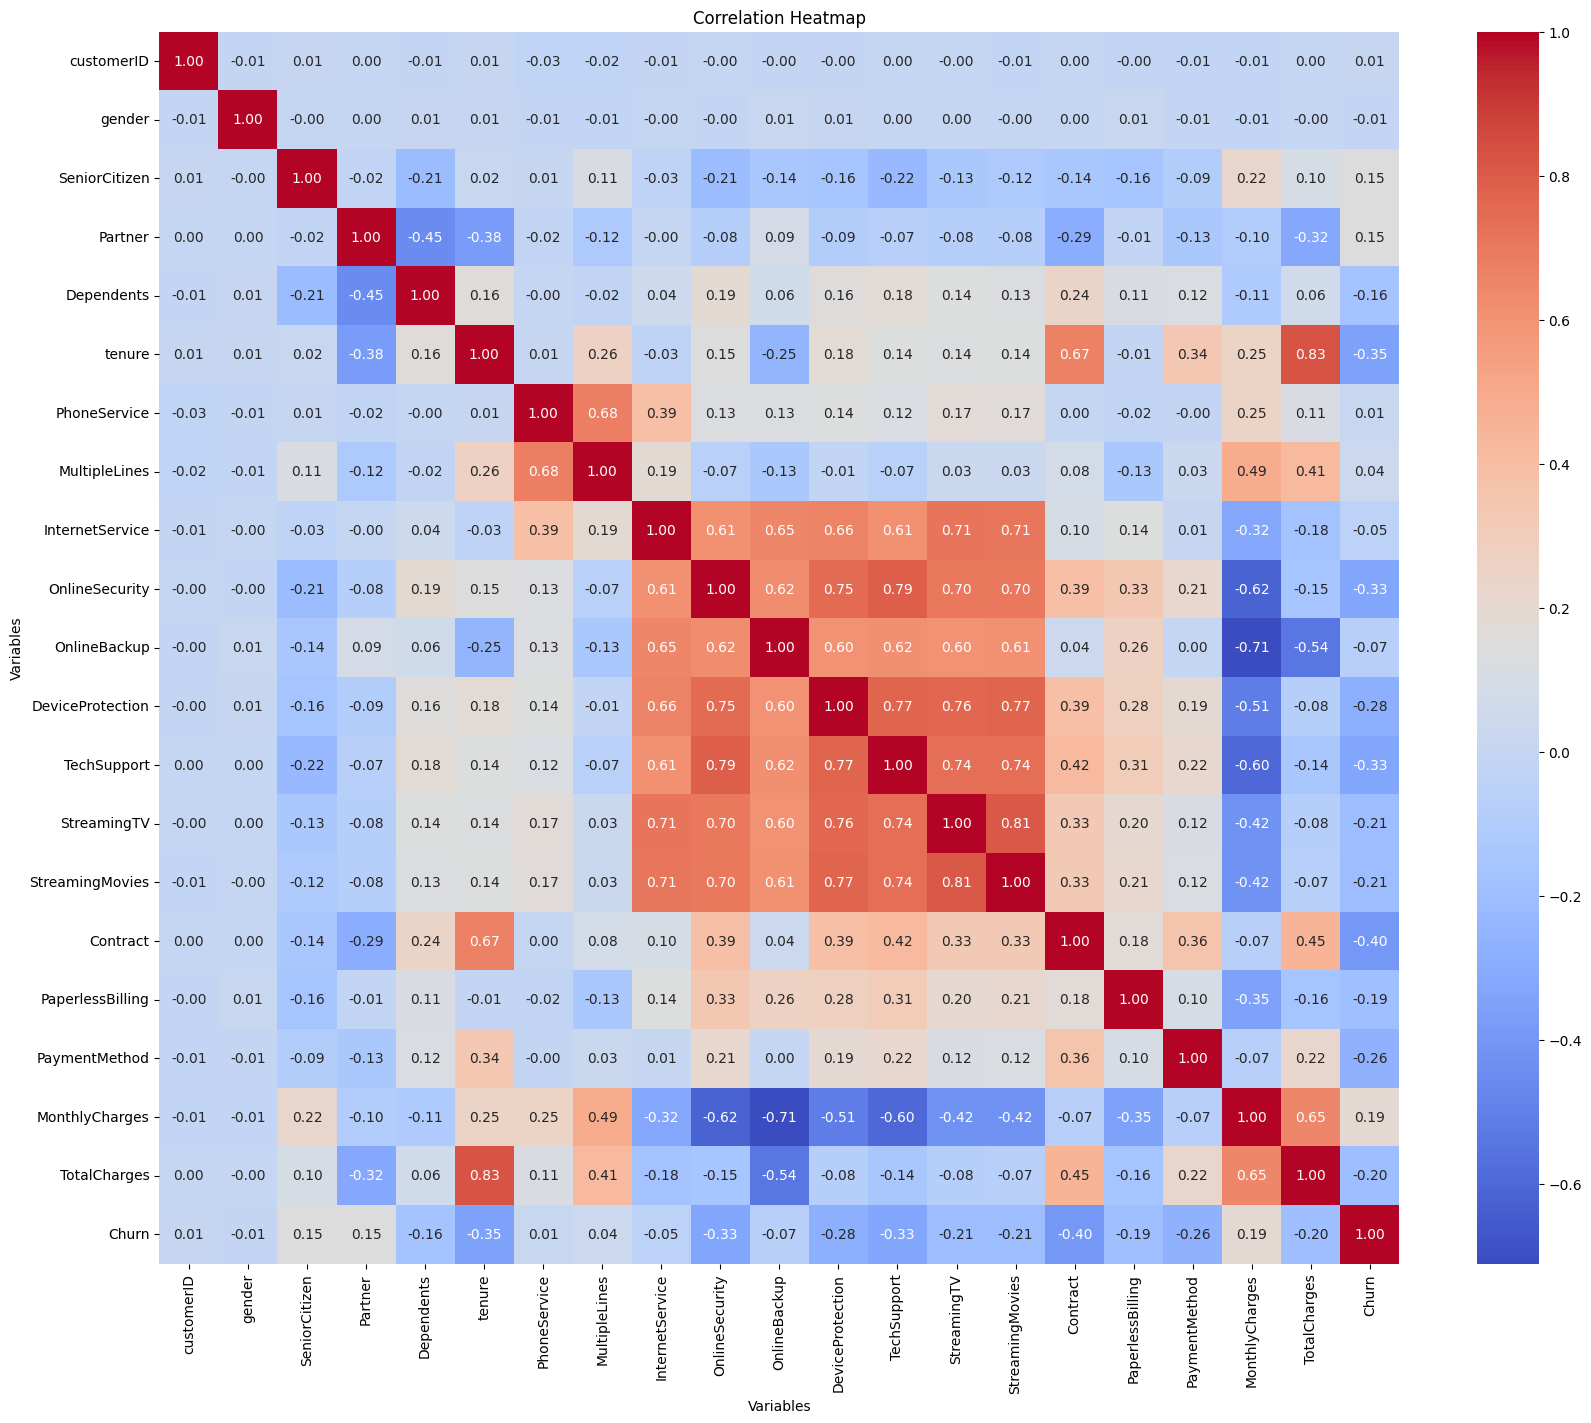

In [45]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    df[col] = pd.factorize(df[col])[0]

corr_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.savefig('heatmap.png')